# Part I - Ford GoBike System Data Exploration
## by Adedamola Adedoyin

## Introduction
The Ford GoBike Dataset originally contains 183412 rows of data and 16 columns. Each row represents a ride made in a bike-sharing system around the San Francisco Bay area in the United State, for the month of February 2019.

Some cleaning will be done to remove rows with missing data and some addition columns will be extracted from the existing ones to create features to aid better data exploration and analysis.


>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling
- Remove rows with nans
- Extract `weekday`, `month`, and `year` columns from the `start_time` column
- Calculate riders `member_age` columns from the riders' birth year column 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [110]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [111]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [112]:
# Drop nans from the DataFrame
df= df.dropna()

# Convert the data types of the start_ and end_time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Convert the user_type and member_gender to categorical (nominal/unordered) data types
cat_cols = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for col in cat_cols:
    df[col]  = df[col].astype('category')

# Convert some float columns to int
int_cols = ['member_birth_year', 'start_station_id', 'end_station_id']
for col in int_cols:
    df[col]  = df[col].astype(int)
    
# Convert some int columns to objects
object_cols = ['bike_id', 'start_station_id', 'end_station_id']
for col in object_cols:
    df[col]  = df[col].astype(object)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [113]:
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour

df['start_weekday'] = df['start_time'].dt.day_name()

df['start_day'] = df['start_time'].dt.day

df['member_age'] = df['start_time'].dt.year - df['member_birth_year']

df['duration_min'] = round(df['duration_sec']/60, 1)

# Drop columns
drop_cols = ['duration_sec', 'member_birth_year',
             'start_station_latitude', 'start_station_longitude', 
             'end_station_latitude', 'end_station_longitude']
df_cut = df.drop(drop_cols, axis = 1)

df_cut.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  object        
 3   start_station_name       174952 non-null  object        
 4   end_station_id           174952 non-null  object        
 5   end_station_name         174952 non-null  object        
 6   bike_id                  174952 non-null  object        
 7   user_type                174952 non-null  category      
 8   member_gender            174952 non-null  category      
 9   bike_share_for_all_trip  174952 non-null  category      
 10  start_hour               174952 non-null  int64         
 11  end_hour                 174952 non-null  int64         
 12  start_weekday   

In [185]:
bike = df_cut.copy()

### What is the structure of your dataset?
For the dataset the timestamp columns are assumed to be in the local time for San Francisco, since no information was given on this. Also, the `bike_share_for_all_trip` column represents two categories members who are enrolled in a special dicount program for low-income areas.

After the preliminary wrangling, which included dropping rows with nans values, creating and dropping some columns, changing data types, etc., the following is the structure of the current `bike` (`df_cut`) dataset:

- A total of 174952 rows and 16 columns
- All data from February 2019
- There are 4607 unique Bike_id which corresponds to the different number of registered bikes
- There are 329 unique stations (each with a station name) as seen in `start_station_id` and `end_station_id` which corresponds to the different number of stations a ride started from and ended at.
- There are 2 unique user type/categories, namely; Customer and Subscriber
- There are 3 unique members' gender categories, namely; Male, Female, and Other 


### What is/are the main feature(s) of interest in your dataset?

The dataset will be further explored visually in  order to find valuable insights needed for analysis of the **main feature of interest**, Which is the ride duration (in minutes) i.e., `duration_min`. Other features of the dataset will be compared to this to see what features are most inflencial in determining ride duration.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Some of the features that will be explored in relation to the feature of interest include:
- Start andEnd hour of ride
- The day of the month
- User's membership type
- Start and end stations
- Member's Gender
- Subscription to special program (bike share for all program)

Some of these features will also be compared again the others.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [118]:
bike.describe()

,start_hour,end_hour,start_day,member_age,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,13.456165,13.609533,15.312337,34.196865,11.733291
std,4.734282,4.748029,8.033926,10.118731,27.370031
min,0.000000,0.000000,1.000000,18.000000,1.000000
25%,9.000000,9.000000,8.000000,27.000000,5.400000
50%,14.000000,14.000000,15.000000,32.000000,8.500000
75%,17.000000,18.000000,22.000000,39.000000,13.200000
max,23.000000,23.000000,28.000000,141.000000,1409.100000


(array([1.74527e+05, 2.21000e+02, 6.50000e+01, 3.00000e+01, 2.50000e+01,
        2.10000e+01, 2.20000e+01, 2.00000e+01, 1.40000e+01, 7.00000e+00]),
 array([1.00000e+00, 1.41810e+02, 2.82620e+02, 4.23430e+02, 5.64240e+02,
        7.05050e+02, 8.45860e+02, 9.86670e+02, 1.12748e+03, 1.26829e+03,
        1.40910e+03]),
 <BarContainer object of 10 artists>)

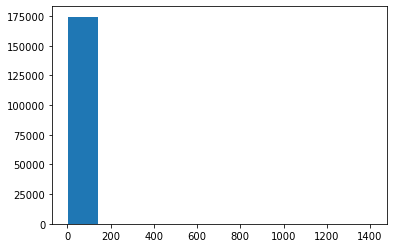

In [218]:
plt.hist(data = bike, x  = 'duration_min')

In [219]:
# Remove entries with extreme value of duration
outlier_mask = bike['duration_min'].quantile(0.99)

bike_cut = bike[bike['duration_min'] <= outlier_mask]
bike_cut.describe()

,start_hour,end_hour,start_day,member_age,duration_min
count,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000
mean,13.454822,13.600159,15.306223,34.191335,10.212023
std,4.739169,4.749123,8.038691,10.112763,7.096984
min,0.000000,0.000000,1.000000,18.000000,1.000000
25%,9.000000,9.000000,8.000000,27.000000,5.400000
50%,14.000000,14.000000,15.000000,32.000000,8.400000
75%,17.000000,18.000000,22.000000,39.000000,13.000000
max,23.000000,23.000000,28.000000,141.000000,52.900000


### What is the distribution of the main feature of interest?

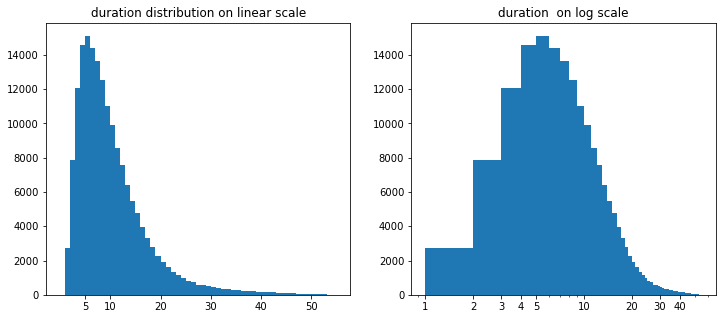

In [243]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.hist(data = bike_cut, x  = 'duration_min', bins = range(0,56,1))
plt.xticks([5,10,20,30,40,50], [5,10,20,30,40,50])
plt.title('duration distribution on linear scale');

plt.subplot(122)
plt.hist(data = bike_cut, x  = 'duration_min', bins = range(0,56,1), )
plt.xscale('log')
plt.xticks([1,2,3,4,5,10,20,30,40], [1,2,3,4,5,10,20,30,40])
plt.title('duration  on log scale');


The maximum duration frequency appears to be around rides lasting for about 4mins to about 7 mins. The data appears to be significantly right-skewed 

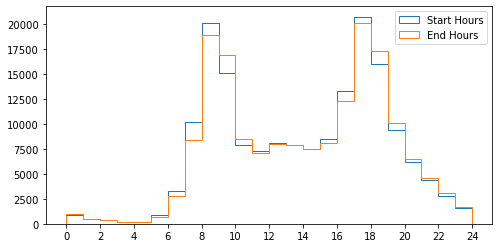

In [265]:
plt.figure(figsize = (8,4))

plt.hist(bike_cut['start_hour'], bins=range(0,25,1), histtype = 'step', label='Start Hours')
plt.xticks(range(0,25,2))

plt.hist(bike_cut['end_hour'], bins=range(0,25,1), histtype = 'step', label='End Hours')
plt.xticks(range(0,25,2))

plt.legend();

The above plot shows a unimodal distribution of the hours of the day that a ride starts (in blue) and ends (in orange). Understandably, the two peak periods are in the morning between the hours of 8am to 9am as members commute to work, and then in the evening, after work, between the hours of 5pm to 6pm.

<Figure size 576x288 with 0 Axes>

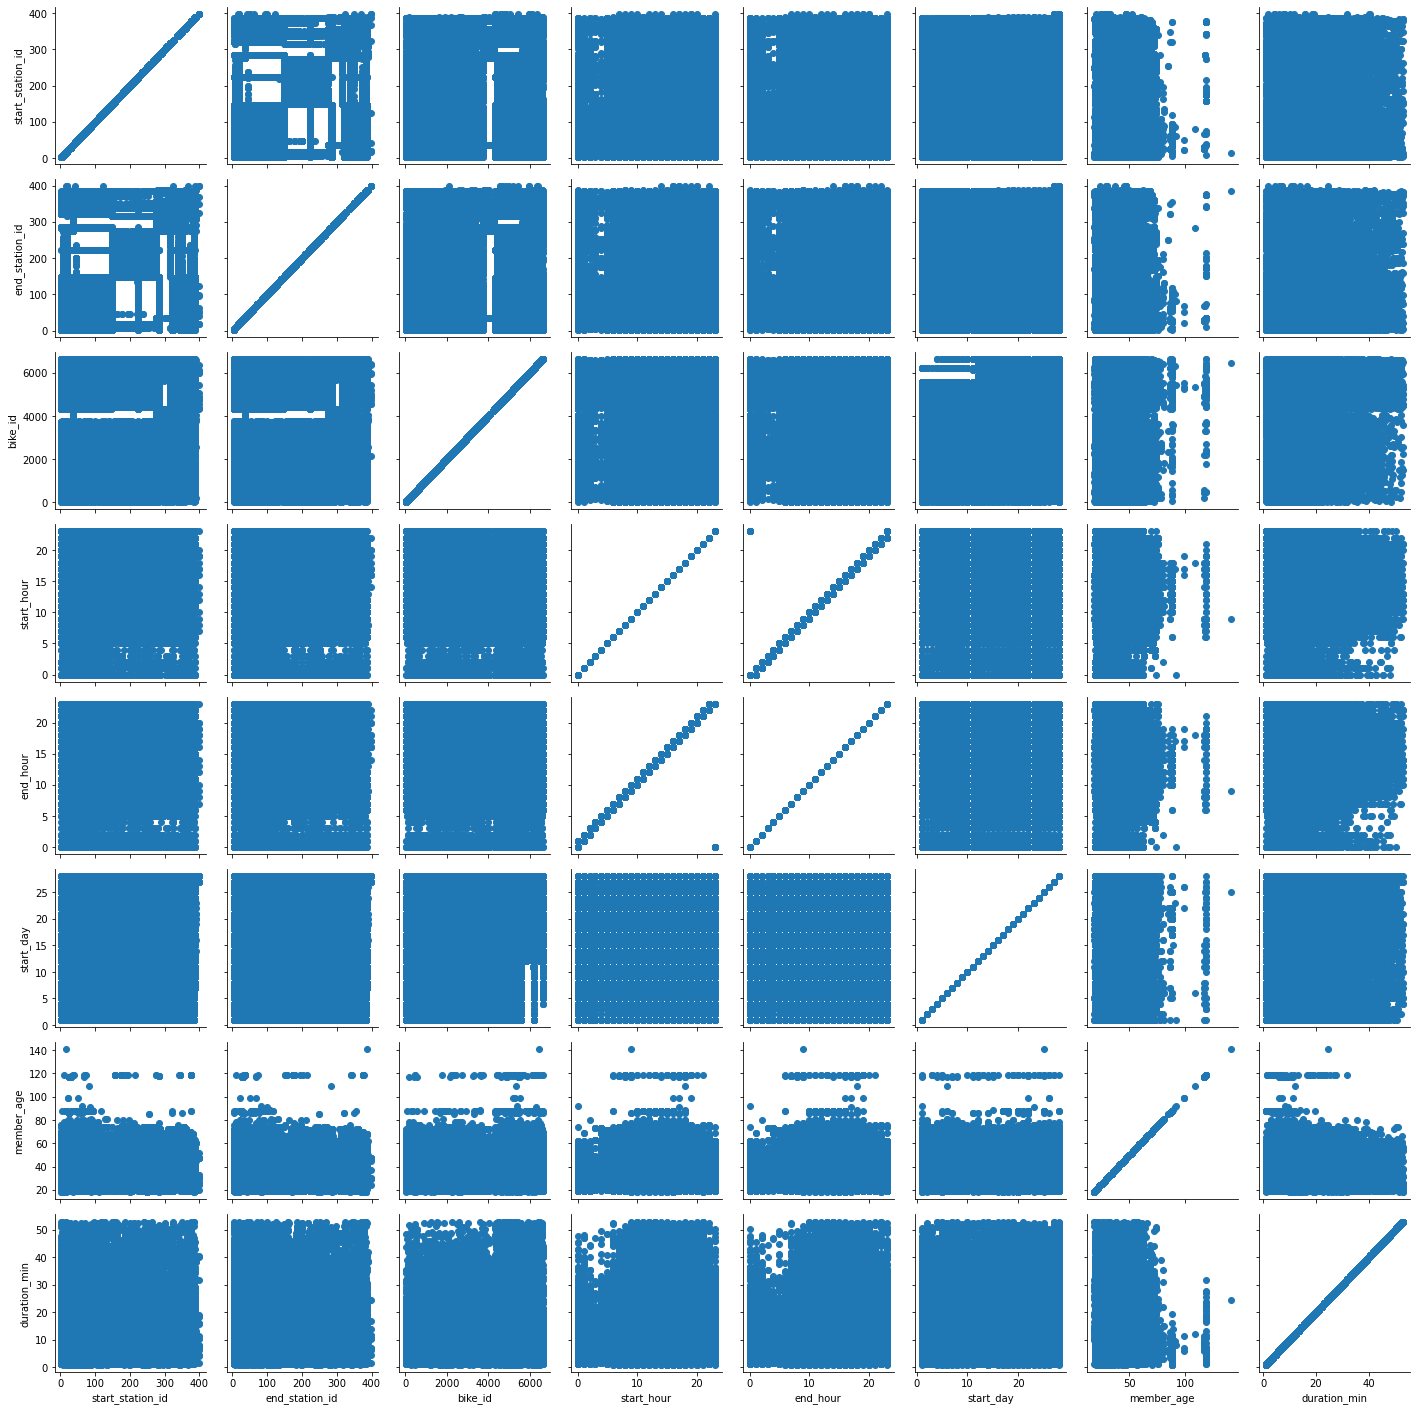

In [267]:
plt.figure(figsize = (8,4))

g=sb.PairGrid(data = bike_cut)
g.map(plt.scatter)




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

